<a href="https://colab.research.google.com/github/vitaoTM/Analise-de-Filmes/blob/main/Analise_de_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=pink> Importando ferramentas 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## <font color=pink> Baixando os dados as serem trabalhados

### **Analizando as notas no geral**

In [ ]:
notas = pd.read_csv('/content/drive/MyDrive/ALURA DATA SCIENCE/introducao-a-data-science-aula0/introducao-a-data-science-aula0/aula0/ml-latest-small/ratings.csv')
notas.columns = ['usuarioID', 'filmesID', 'nota', 'tempo']
notas.head()

,usuarioID,filmesID,nota,tempo
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<font size=6> **Olhando os filmes**

In [ ]:
filmes = pd.read_csv('/content/drive/MyDrive/ALURA DATA SCIENCE/introducao-a-data-science-aula0/introducao-a-data-science-aula0/aula0/ml-latest-small/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.columns = ['filmesID', 'titulo', 'genros']
filmes.head()

,filmesID,titulo,genros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## <font color=green> Analisando algumas notas especificas por filme

In [ ]:
notas.query('filmesID==1').nota.mean()

3.9209302325581397

<font size=6> **Agrupando notas por filme e tirando a media dessas notas**

In [ ]:
notas.groupby('filmesID')

In [ ]:
medias_por_filme = notas.groupby('filmesID').mean()['nota']
medias_por_filme.head(10)

filmesID
1     3.920930
2     3.431818
3     3.259615
4     2.357143
5     3.071429
6     3.946078
7     3.185185
8     2.875000
9     3.125000
10    3.496212
Name: nota, dtype: float64

## <font color= pink> <font size = 6> Plotando Gráficos com Bibliotecas:
* <font color=pink> **Pandas**
* <font color=pink> **Seaborn**
* <font color=pink> **MatPlotLib**

**Grafico de distribuicao das notas**

* O grafico apresenta a frequencia que uma nota foi dada.
* Observa-se que a concentração é maior entre as notas 3 e 4.5  

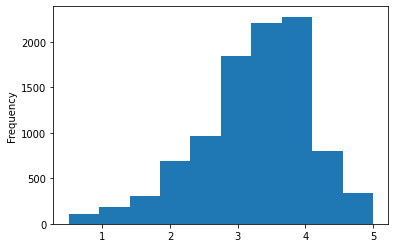

In [ ]:
# Padrão do pandas 
medias_por_filme.plot(kind='hist')

Text(0.5, 1.0, 'Histograma das medias dos filmes')

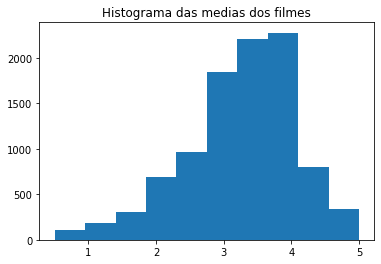

In [ ]:
# MatPlotLib
plt.hist(medias_por_filme)
plt.title('Histograma das medias dos filmes')

**Grafico do tipo BoxPlot**

* Nesse grafico, melhor se visualiza a distribuição das notas.
* Repara-se que 50% das notas estão na faixa de ~2.8 ~4.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


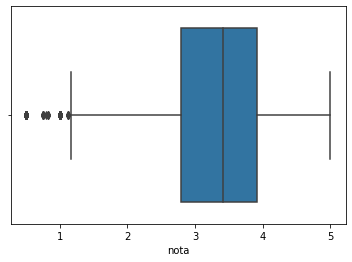

In [ ]:
# SeaBorn
sns.boxplot(medias_por_filme)

**Gráfico de dispersão**

*  Nesse gráfico é mostrado a distribuição de notas, onde na curva e observado a maior frequencia de notas.
* Nota-se que essa curva de distribuição é dividida em 10 partes, onde a há um incremento da nota de 0.5 em 0.5. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


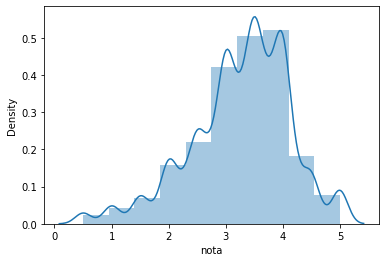

In [ ]:
#SeaBorn
sns.distplot(medias_por_filme, bins=10)

## <font color=green> **Importando outra base de dados (TMDB)**

In [ ]:
tmdb = pd.read_csv('/content/drive/MyDrive/ALURA DATA SCIENCE/introducao-a-data-science-aula0/introducao-a-data-science-aula0/aula0/ml-latest-small/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## <font color=pink>**Analisando as linguagens dos filmes no dataset**

In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

### <font color= pink>**Verificando a quantidade de filmes em cada lingua**

In [ ]:
contagem_de_linguas = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ['linguagem', 'total']
contagem_de_linguas.head()

,linguagem,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [ ]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_resto = total_geral - total_de_ingles

print(f' Total de filmes em Ingles {total_de_ingles},\n Total de outras linguas {total_resto} ')

 Total de filmes em Ingles 4505,
 Total de outras linguas 298 


**Criando um Pandas.DataFrame separando filmes em ingles de filmes com outra lingua**

In [ ]:
dados = {
    'lingua': ['inlges', 'outros'],
    'total': [total_de_ingles, total_resto]
}
dados

{'lingua': ['inlges', 'outros'], 'total': [4505, 298]}

In [ ]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,inlges,4505
1,outros,298


## Plotando 

**Analisando os tipos de visualizacao grafica que podem ser feitas.**

* No primeiro grafico pode se ter uma ideia da quantidade de filmes em outra linguagens.
 

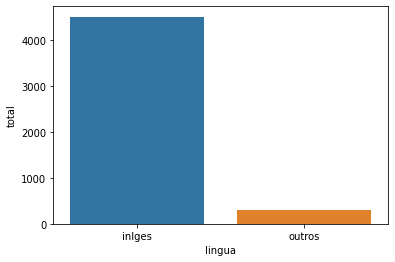

In [ ]:
sns.barplot(x='lingua', y='total', data=dados)

* No segundo grafico, é possivel ver a diferença na quantidade de filmes em outras liguas, porém esse visualização não é tão fácil de se correlacionar.
* ex. -> é dificil de saber a proporção de filmes em ingles existem em relação a outras linguas.

([<matplotlib.patches.Wedge at 0x7fcbe7df92d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'inlges'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

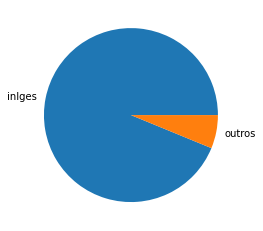

In [ ]:
ax = plt.pie(dados['total'], labels=dados['lingua'])
ax

**Nesse Grafico de Barras, pode-se ter uma ideia de quantas linguas existem, porem a visualização também não agradável.**

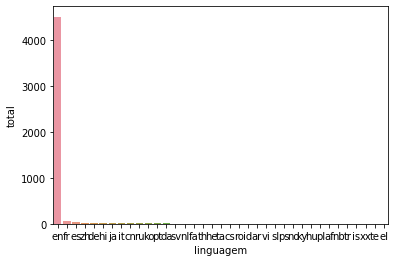

In [ ]:
sns.barplot(data= contagem_de_linguas, x='linguagem', y='total')

### Plotando grafico com numero de filmes que não são de lingua inglesa

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_lingua_original_em_ingles.head()
filmes_sem_lingua_original_em_ingles.index

Index(['fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt', 'da',
       'sv', 'fa', 'nl', 'he', 'th', 'ro', 'id', 'ar', 'cs', 'ta', 'tr', 'nb',
       'af', 'pl', 'is', 'hu', 'vi', 'ky', 'xx', 'te', 'no', 'sl', 'ps', 'el'],
      dtype='object')

In [ ]:
total_por_filme_outras_linguas = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_filme_outras_linguas.head()

fr    70
es    32
zh    27
de    27
hi    19
Name: original_language, dtype: int64

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

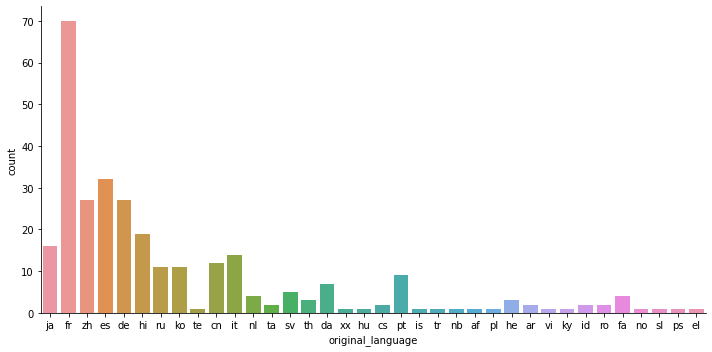

In [ ]:
sns.catplot(x = "original_language",
            data = filmes_sem_lingua_original_em_ingles, 
            kind="count", 
            aspect=2,
)

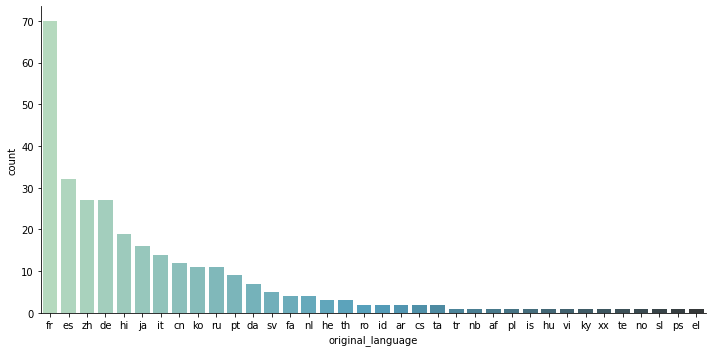

In [ ]:
sns.catplot(x = "original_language",
            data = filmes_sem_lingua_original_em_ingles, 
            kind="count", 
            aspect=2,
            palette="GnBu_d",
            order = total_por_filme_outras_linguas.index
)

In [ ]:
filmes.head()

,filmesID,titulo,genros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analise estatistica de 2 filmes (Toy Story e Jumanji)

<font color=green>**Primeiramente verificou a quantidade de notas dadas para cada filme**

In [ ]:
notas_toy_story = notas.query('filmesID == 1')
notas_jumanji = notas.query('filmesID == 2')
print(f'Quantidade de notas do Toy Story {len(notas_toy_story)}\n Quantidade de notas de jumanji {(notas_jumanji)}')

 Quantidade de notas do Toy Story 215
 Quantidade de notas de jumanji 110


<font color=greem> **Mediana das notas**

In [ ]:
print(f' Mediana do Toy Story {notas_toy_story.nota.median()}')
print(f' Mediana do Jumanji {notas_jumanji.nota.median()}')


 Mediana do Toy Story 4.0
 Mediana do Jumanji 3.5


<font color=greem> **Média das notas**

* Porém, nessa análise, a média nao nos tras informações relevantes
* Nesse caso a média das notas, atrapalha o entendimento da análise, pois nao mostra uma distribuição que indica se o filme é ou não relevante. 

In [ ]:
print(f' Nota media do Toy Story {round(notas_toy_story.nota.mean(), 2)}')
print(f' Nota media de Jumanji {round(notas_jumanji.nota.mean(), 2)}')

 Nota media do Toy Story 3.92
 Nota media de Jumanji 3.43


<font color=greem> **Moda estatística das notas**

* Porém, segue na mesma linha da média
* A pesar de uma nota aparecer mais vezes, também não é indicativo de que a distribuição das mesmas estejem somente ali.

In [ ]:
print(f' Moda das notas de Toy Story {notas_toy_story.nota.mode()}')
print(f' Moda das notas de Jumanji {notas_jumanji.nota.mode()}')

 Moda das notas de Toy Story 0    4.0
dtype: float64
 Moda das notas de Jumanji 0    4.0
dtype: float64


<font color=greem> **Maximos e minimos**

* Mais uma vez não é possível concluir muita coisa com essa análise
* Apenas se sabe que houveram nota minima de 0.5 e e maxima de 5.0 em ambos os filmes


In [ ]:
print(f' Maior nota do Toy Story {notas_toy_story.nota.max()}')
print(f' Menor nota do Toy Story {notas_toy_story.nota.min()}')
print(f' Maior nota do Jumnaji {notas_jumanji.nota.max()}')
print(f' Menor nota do Jumanji {notas_jumanji.nota.min()}')


 Maior nota do Toy Story 5.0
 Menor nota do Toy Story 0.5
 Maior nota do Jumnaji 5.0
 Menor nota do Jumanji 0.5


## <font color=green> **Plotagem de graficos**

* Por fim se plotou um grafico de caixa (BoxPlot)
* Essa análise visual, finalmente nos permite fazer algumas conclusões:
    * 1° 50% das notas do Toy story (1) estão entre 3,5 e 4,5
    
    * 2° 50% das notas de Jumanji estão entre 3.0 e 4.0
* Dado apenas isso pode se dizer que Toy Story teve mais sucesso do que Jumandi.
* Porém, ainda é necessário mais algumas análises 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7fcbe2569d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcbe256e890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcbe2554a50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcbe2554e10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcbe25b0090>,
  <matplotlib.lines.Line2D at 0x7fcbe25d6810>]}

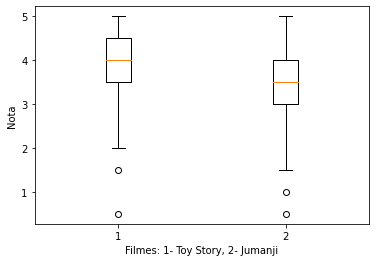

In [ ]:
plt.xlabel('Filmes: 1- Toy Story, 2- Jumanji')
plt.ylabel('Nota')
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

Text(0, 0.5, 'Notas')

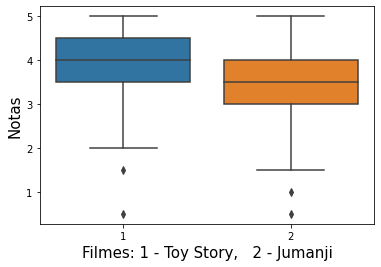

In [ ]:
# Utilizando Seaborn para plotar o mesmo boxplot 
ax = sns.boxplot(x='filmesID', 
            y = 'nota',
            data = notas.query('filmesID in [1, 2]')
            )
ax.set_xlabel('Filmes: 1 - Toy Story,   2 - Jumanji', fontsize=15)
ax.set_ylabel('Notas', fontsize=15)

 <font color=greem> **Desvio pardrão**

 * Com o desvio padrão é possivel observar o variabilidade, e obter a variaância.
 


In [ ]:
print(f'Desvio padrão das notas de Toy Story {round(notas_toy_story.nota.std(), 2)}')
print(f'Desvio padrão das notas de Jumanji {round(notas_jumanji.nota.std(),2)}')

Desvio padrão das notas de Toy Story 0.83
Desvio padrão das notas de Jumanji 0.88


 <font color=greem> **Variância**



* "Dado um conjunto de dados, a variância é uma medida de dispersão que mostra o quão distante cada valor desse conjunto está do valor central (médio). Quanto menor é a variância, mais próximos os valores estão da média; mas quanto maior ela é, mais os valores estão distantes da média."


In [ ]:
print(f'Variancia das notas de Toy Story {round(np.var(notas_toy_story.nota), 2)}')
print(f'Variancia das notas de Jumanji {round(np.var(notas_jumanji.nota), 2)}')

Variancia das notas de Toy Story 0.69
Variancia das notas de Jumanji 0.77


<font color= greem> **Coeficiente de correlação**

* A análise das notas desses 2 filmes acaba aqui, não podemos tirar mais conclusões, pois não se pode fazer uma coorrelação de dados com dimenções diferentes.
* Não se pode ter um julgamento justo de comparação entre esses dois filmes pois,
* No filme Toy Story temos 215 notas, enquanto que no filme Jumanji temos 110, visto no _return_ do codigo abaixo.

In [ ]:
np.corrcoef(notas_toy_story.nota, notas_jumanji.nota)

ValueError: ignored

In [ ]:
print(f'Quantidade de notas dadas para Toy Story {len(notas_toy_story.nota)}')
print(f'Quantidade de notas dadas para Jumanji {len(notas_jumanji.nota)}')


Quantidade de notas dadas para Toy Story 215
Quantidade de notas dadas para Jumanji 110


# <font color=greem> **Conclusões**

* Vimos no grafico de caixa, que aparentemente o filme Toy Story foi melhor aceito em termos de notas do que o filme Jumanji,

<font size = 6>Porém

* Para essa análise a média não é relevante, pois ela não indica uma preferência de notas dadas. 

* Apesar dessas analises não podemos correlacionar os dois filmes citados (toy story e Jumanji), pois suas dimenções são muito discrepantes uma da outra.


